In [2]:
import math
import numpy as np
import scipy.stats as scs 
import matplotlib.pyplot as plt 
import numpy.random as random
# import seaborn as sns
# sns.set_theme()

In [3]:
fact = math.factorial

def proba(n, a, b, k):
    if k <= n:
        return fact(n) * fact(k+a-1) * fact(n-k+b-1) * fact(a+b-1) / (fact(k) * fact(n-k) * fact(n+a+b-1) * fact(a-1) * fact(b-1))
    else:
        return 0

def verifier(n, a, b):
    return np.isclose(sum([proba(n, a, b, k) for k in range(n+1)]), 1)

In [4]:
verifier(10, 5, 5)

True

On a 
$$ \frac{n+b-k}{n+a+b}\,\mathbb{P}_{n,a,b}[k] = \frac{n! (k+a-1)! (n-k+b)! (a+b-1)!}{k! (n-k)! (n+a+b)! (a-1)! (b-1)!}$$
et
$$ \frac{k+a-1}{n+a+b}\,\mathbb{P}_{n,a,b}[k-1] = \frac{n! (k+a-1)! (n-k+b)! (a+b-1)!}{(k-1)! (n-k+1)! (n+a+b)! (a-1)! (b-1)!}.$$
Donc, la somme vaut :
$$ \frac{(k+a-1)! (n-k+b)! (a+b-1)!}{(n+a+b)! (a-1)! (b-1)!} \left( \binom{n}{k} + \binom{n}{k-1}\right) = \frac{(n+1)! (k+a-1)! (n-k+b)! (a+b-1)!}{k! (n+1-k)! (n+a+b)! (a-1)! (b-1)!},$$
ce qui est la formule pour $\mathbb{P}_{n+1,a,b}[k]$.

In [5]:
def tirer_au_hasard(n, a, b, keep=False):
    res = [a]
    for i in range(n):
        alea = random.random()
        if alea <= res[-1]/(i+a+b):
            res.append(res[-1]+1)
        else:
            res.append(res[-1])
    if keep:
        return res
    else:
        return res[-1]-a

In [6]:
[tirer_au_hasard(10, 5, 5) for _ in range(20)]

[7, 4, 8, 3, 7, 7, 6, 7, 8, 3, 4, 5, 2, 7, 6, 4, 3, 6, 5, 5]

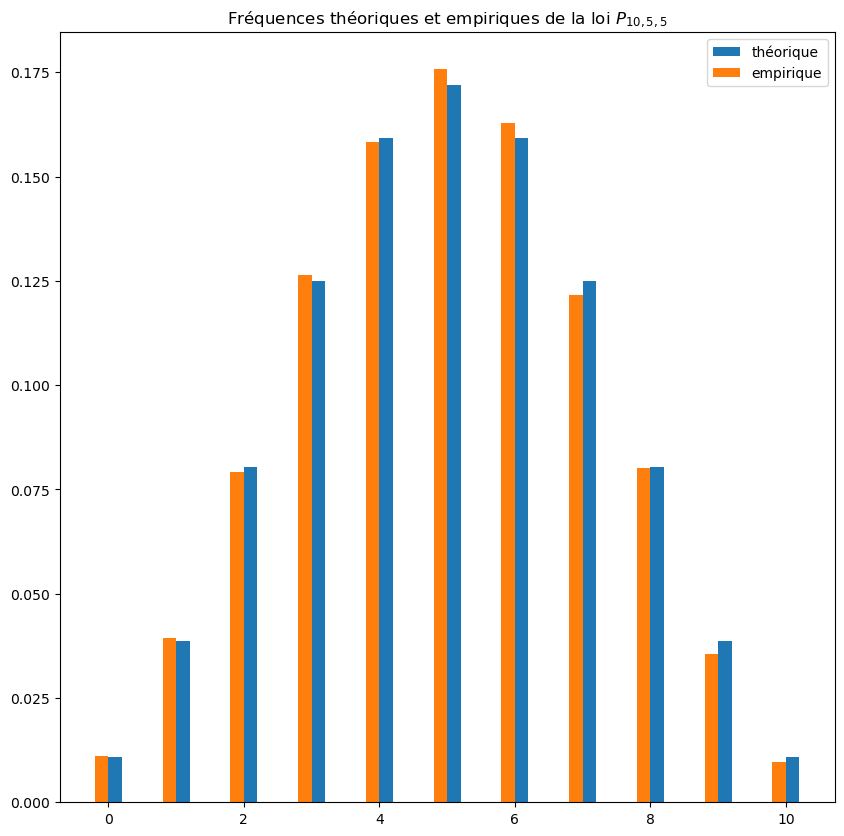

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(np.arange(0,11),[proba(10, 5, 5, k) for k in range(11)], align="edge", width=0.2, label="théorique")
alea = [tirer_au_hasard(10, 5, 5) for _ in range(10000)]
ax.bar(np.arange(0,11),[alea.count(k)/10000 for k in range(11)], align="edge", width=-0.2, label="empirique")
ax.legend()
ax.set_title("Fréquences théoriques et empiriques de la loi $P_{10,5,5}$")
plt.show()

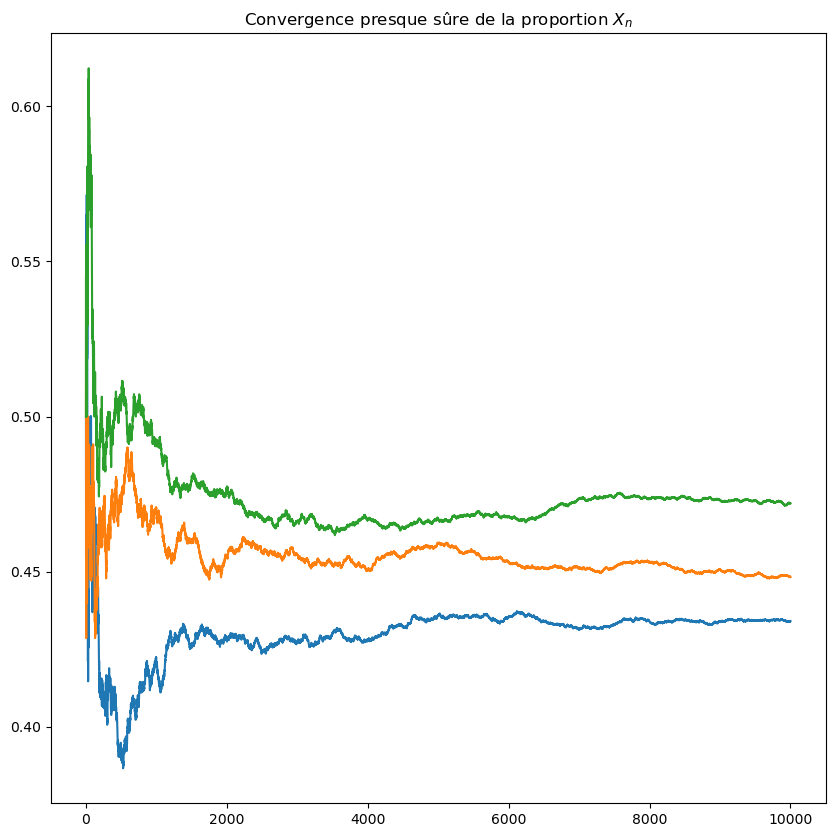

In [8]:
def proportion(N, a, b, ax):
    alea = np.array(tirer_au_hasard(N, a, b, True)) / np.arange(a+b, a+b+N+1)
    ax.plot(np.arange(0, N+1), alea)

fig, ax = plt.subplots(figsize=(10,10))
for _ in range(3):
    proportion(10000, 5, 5, ax)

ax.set_title("Convergence presque sûre de la proportion $X_n$")
plt.show()

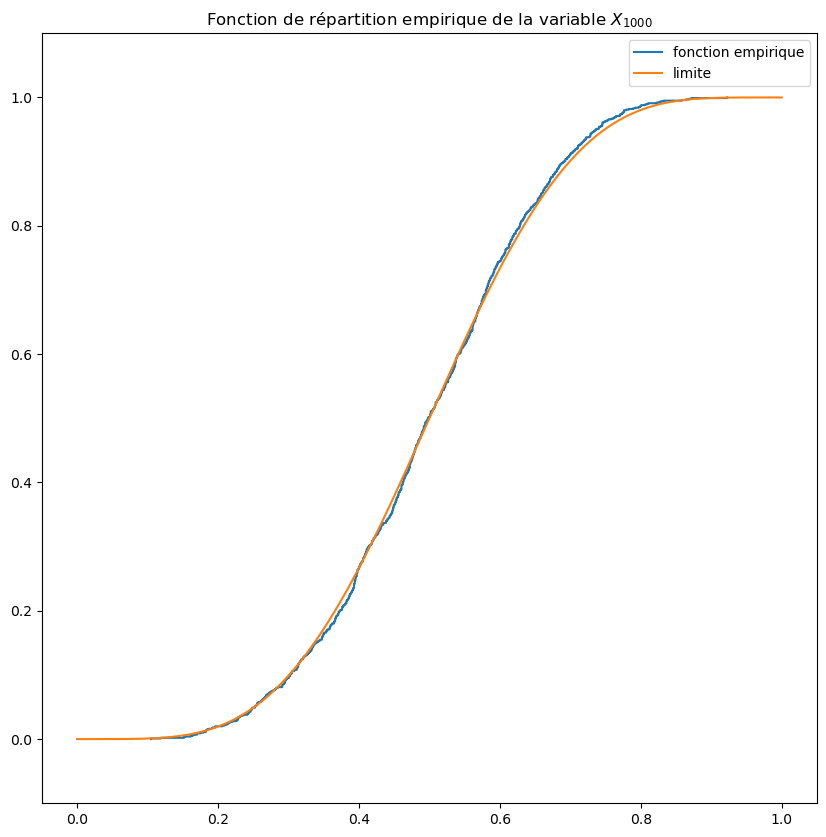

In [9]:
echantillon = np.array([tirer_au_hasard(1000, 5, 5) + 5 for _ in range(1000)])/1010
fig, ax = plt.subplots(figsize=(10,10))
ax.ecdf(echantillon, label="fonction empirique")
ax.set_ylim([-0.1, 1.1])
ax.set_title("Fonction de répartition empirique de la variable $X_{1000}$")
xx = np.linspace(0, 1, 500)
ax.plot(xx, scs.beta.cdf(xx, 5, 5), label="limite")
ax.legend()
plt.show()

In [10]:
def densitydemicercle(x):
    if -2<x<2:
        return math.sqrt(4-x*x)/(2*math.pi)
    else:
        return 0

def pointdemicercle():
    point = [4*random.random()-2, random.random()/math.pi]
    while densitydemicercle(point[0]) < point[1]:
        point = [4*random.random()-2, random.random()/math.pi]
    return point



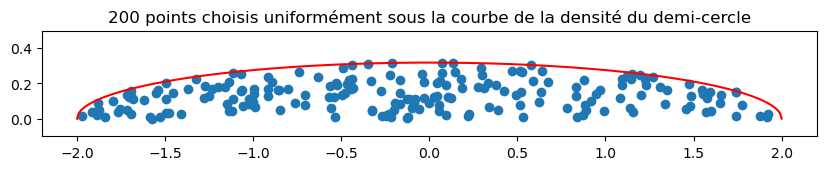

In [20]:
fig, ax = plt.subplots(figsize=(10,10))
points = np.array([pointdemicercle() for _ in range(200)])
ax.scatter(points[:,0],points[:,1])
ax.set_aspect(1)
ax.set_ylim([-0.1,0.5])
xx = np.linspace(-2, 2, 500)
ax.plot(xx, [densitydemicercle(x) for x in xx], color="r")
ax.set_title("200 points choisis uniformément sous la courbe de la densité du demi-cercle")
plt.show()

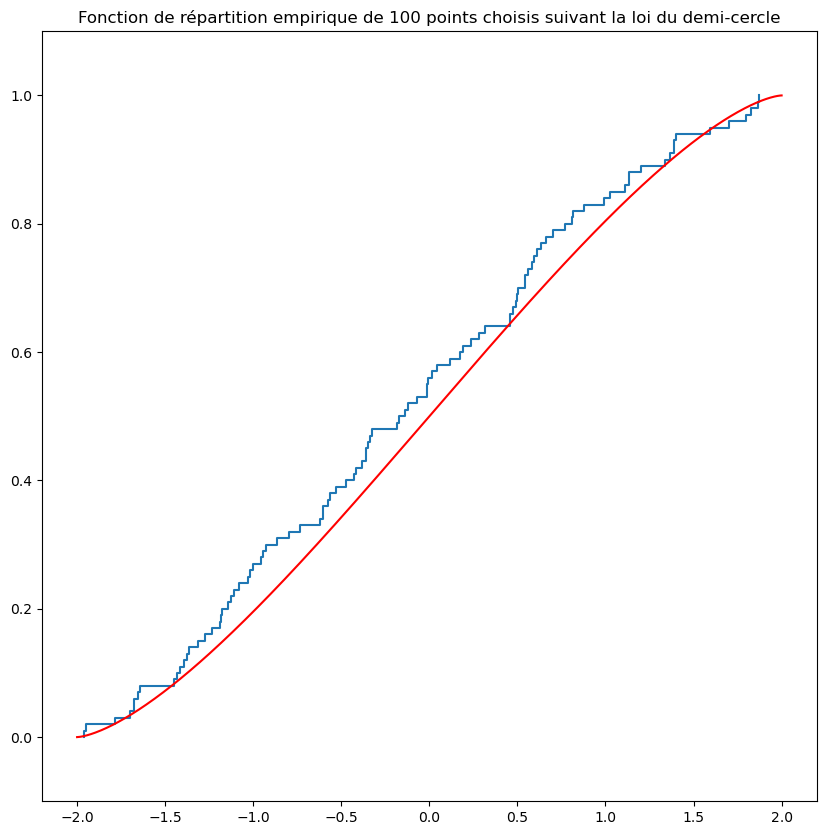

In [31]:
def repartition_empirique_demicercle(N):
    alea = np.array([pointdemicercle() for _ in range(N)])[:,0]
    fig, ax = plt.subplots(figsize=(10,10))
    ax.ecdf(alea)
    xx = np.linspace(-2, 2, 500)
    ax.plot(xx, scs.semicircular.cdf(xx, scale=2), color="r")
    ax.set_ylim([-0.1,1.1])
    ax.set_xlim([-2.2,2.2])
    ax.set_title(f"Fonction de répartition empirique de {N} points choisis suivant la loi du demi-cercle")
    plt.show()
    
repartition_empirique_demicercle(100)

In [27]:
def wigner(N):
    res = scs.norm.rvs(size=(N,N))
    for i in range(N):
        for j in range(i):
            res[i,j] = res[j,i]
    return res/np.sqrt(N)

In [29]:
def spectre(N):
    M = wigner(N)
    w, v = np.linalg.eigh(M)
    return w

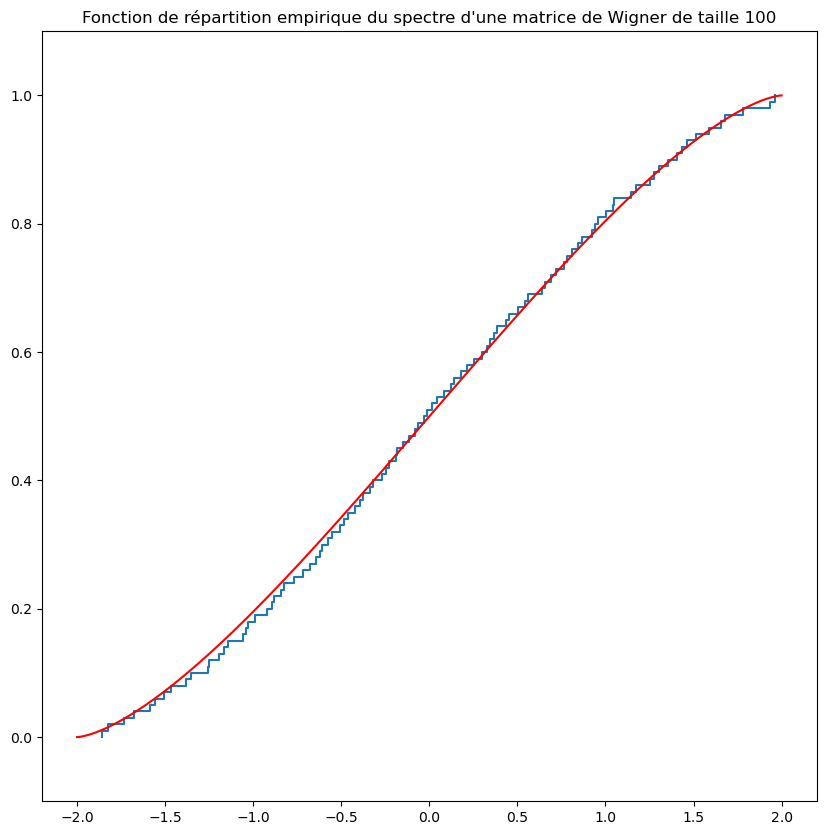

In [32]:
alea = spectre(100)
fig, ax = plt.subplots(figsize=(10,10))
ax.ecdf(alea)
xx = np.linspace(-2, 2, 500)
ax.plot(xx, scs.semicircular.cdf(xx, scale=2), color="r")
ax.set_ylim([-0.1,1.1])
ax.set_xlim([-2.2,2.2])
ax.set_title(f"Fonction de répartition empirique du spectre d'une matrice de Wigner de taille 100")
plt.show()